# The Photon Gas

This exercise gives you an example of a Metropolis Monte Carlo algorithm, where you will apply this type of algorithm to calculate the state occupancy of a photon gas. The photon gas is a gas-like collection of photons, which has many of the same
properties of a conventional gas such as pressure, temperature and
entropy. The most common example of a photon gas in equilibrium is
black-body radiation. Black-body radiation is an electromagnetic field
constructed by a superposition of plane waves of different frequencies,
with the caveat that a mode may only be excited in units of $\hbar w$.
This fact leads to the concept of photons as quanta of the
electromagnetic field, with the state of the field being specified by
the occupancy $\left<n_j\right>$ of each of the modes or, in other
words, by enumerating the number of photons with each frequency.

## Ensemble Averages from the Metropolis Monte Carlo Algorithm

The ensemble average of the state occupancy $\left<n_j\right>$ of a
photon gas can be calculated analytically. Deriving the total energy of
an idealised photon gas from quantum mechanics we know that $U$ can be
written as the sum of the harmonic oscillation energies:

$$
\begin{aligned}
U= \sum_{j=1}^{N} n_j w_j \hbar = \sum_{j=1}^{N} n_j \epsilon_j,
\end{aligned}
$$ (total_energy_photongas)

where $\epsilon_j$ is the energy of state $j$, $n_j$ is the occupancy of
state $j$ ($n_j \in 0,1,2,\cdots, \infty$), $N$ is the total number of
photons and $w$ is the oscilator frequency. In this exercise, you are
going to compute the ensemble average of the occupancy
$\left<n_j\right>$. 

The scheme you will employ is as follows:

1.  Start with an arbitrary $n_j$.

2.  Decide to perform a trial move to randomly increase or decrease
    $n_j$ by 1.

3.  Accept the trial move with probability: 

    $$
    \begin{aligned}
    P_{acc}(o \rightarrow n)= \min \left(1, e^{-\beta(U(n)-U(o))}\right),\end{aligned}
    $$
    
    where $U(n)$ and $U(o)$ are the energies of the new and old states
    respectively.

4.  Update averages regardless of acceptance or rejection.

5.  Go to step 2).

## Implementing a Metropolis Monte Carlo Algorithm

In [1]:
import random as r
import math as m
import matplotlib.pyplot as plt
import numpy as np 

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# Random Seed
r.seed(42)

<div class="exercise admonition" name="2ex4" style="padding: 10px">
<p class="title">Exercise 3</p>
Make modifications in the code, right after the commented section ‘MODIFICATION ... END MODIFICATION’. Include the entire code within your report and comment upon the part that you wrote.
</div>

<div class="exercise admonition" name="2ex4" style="padding: 10px">
<p class="title">Exercise 4</p>
How can this scheme retain detailed balance when $n_j = 0$? Note that $n_j$  cannot be negative.
</div>

In [2]:

numberOfIterations = 1000
beta = 1.0

def calculateOccupancy(beta=1.0):

    trialnj = 1
    currentnj = 1
    njsum = 0
    numStatesVisited = 0
    estimatedOccupancy=0

    """  MODIFICATION
    Metropolis algorithm implementation to calculate <n_j>
    Tasks:
    1) Loop from int i = 0 to numberOfiterations
    2) Call r.randint(0,1) to perform a trial move to randomly increase
        or decrease trialnj by 1.
        Note: randint(0,1) returns random integers from 0 to 1 (i.e. 0 OR 1)
               but you need to extract -1 OR 1
        Hint: use trialnj = currentnj +- 1;
    3) Test if trialnj < 0, if it is, force it to be 0
    4) Accept the trial move with probability defined in the Theory section
        Note: Accepting the trial move means updating current sample (currentnj)
        with the new move (trialnj);
    5) sum currentnj and increase numStatesVisited by 1
    6) compute estimatedOccupancy after numberOfiterations iterations
    
    END MODIFICATION
    """
    # INSERT YOUR CODE HERE 

    # Loop from int i = 0 to numberOfiterations

    # Randomly decrease or increase trialnj

    #if trialnj is <0, set to 0

    # Accept move if probability is high

    # sum currentnj and increase numStatesVisited

    # compute estimatedOccupancy 
    estimatedOccupancy = 1  # modify
    
    return estimatedOccupancy

# perform a single calculation
estimatedOccupancy = calculateOccupancy(beta=beta)

<div class="exercise admonition" name="2ex4" style="padding: 10px">
<p class="title">Exercise 5</p>
Using your code, plot the photon-distribution (average occupation number as a function of $\beta\epsilon\in[0.1,2]$). 

Assume that the initial $n_j =1$ and $\epsilon_j=\epsilon$ and recalculate the with the same $\beta\epsilon$ values the analytical solution
    $$\left< N \right> = \frac{1}{e^{\beta\epsilon}-1}$$
Plot your calculated values versus those from the analytical solution and include your curve in your report. What is the influence of the number of MC iterations on the estimated result vs the analytical one? Why?
</div>

In [3]:
# generate an array of betas from 0.1 to 2 
betas=np.linspace(0.1,2)

# generate y values for function using the beta values
analytical_y= 1/(np.exp(betas)-1)

In [4]:
# this line iterates over all betas that we want to use 
estimated_y=[calculateOccupancy(beta=b) for b in betas]

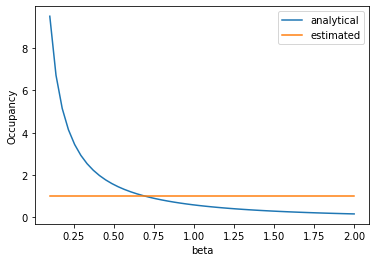

In [5]:
fig, ax = plt.subplots(1)
ax.plot(betas,analytical_y, label='analytical')
ax.plot(betas,estimated_y, label='estimated')

ax.set_xlabel("beta")
ax.set_ylabel('Occupancy')
ax.legend()
plt.show()

<div class="exercise admonition" name="3bex1" style="padding: 10px">
<p class="title">Exercise 6 - Bonus</p>
Modify the program in such a way that the averages are updated only after an accepted trial move. Why does ignoring rejected moves lead to erroneous results? *Hint*: define $P'(o \rightarrow o)$ (*i.e*  the probability that you stay in the old configuration) and recall that the transition probability $P'$ is normalised.
</div>

<div class="exercise admonition" name="3bex1" style="padding: 10px">
<p class="title">Exercise 7 - Bonus</p>
At which values of $\beta$ does the error you obtain when ignoring rejected moves become more pronounced? Why?
</div>